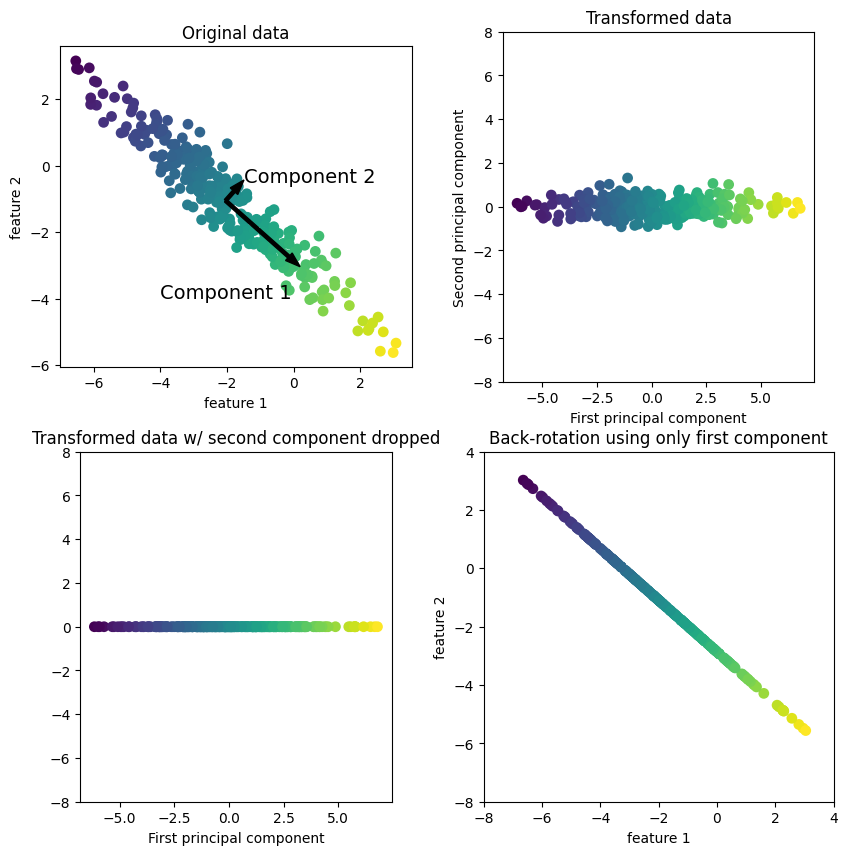

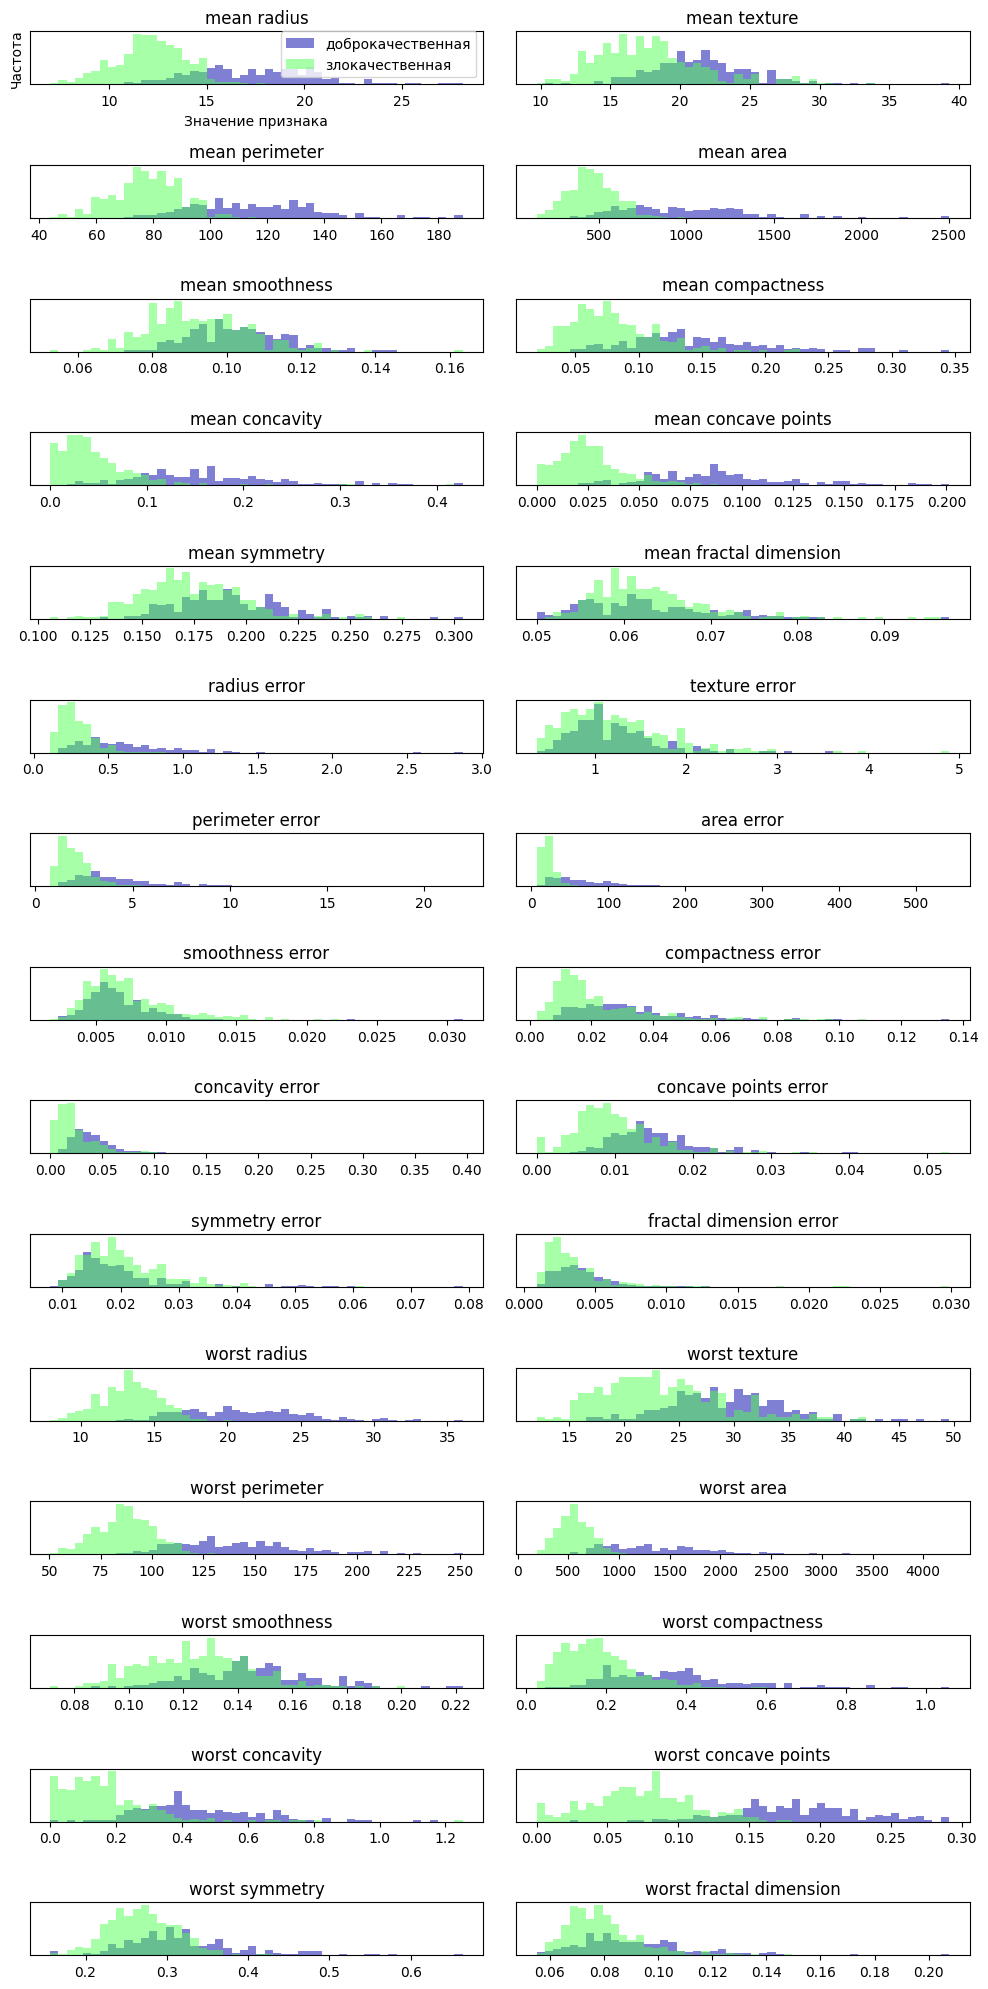

Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


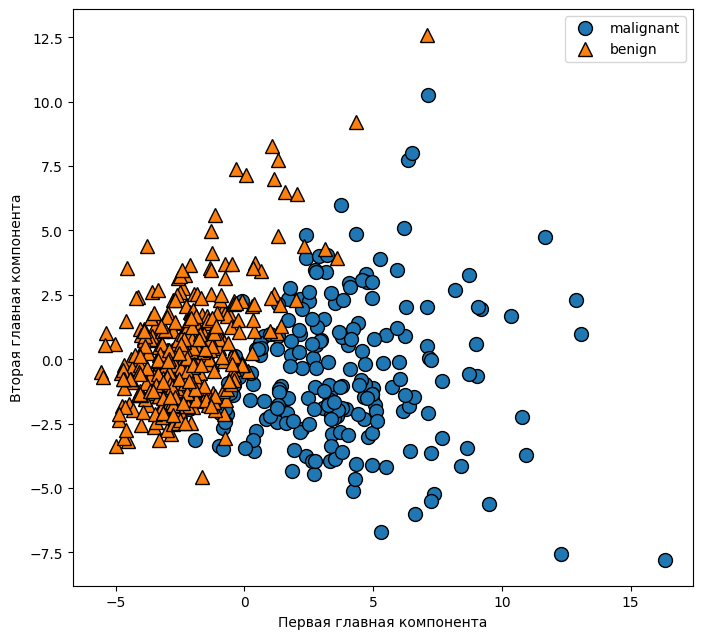

форма главных компонент: (2, 30)
компоненты PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


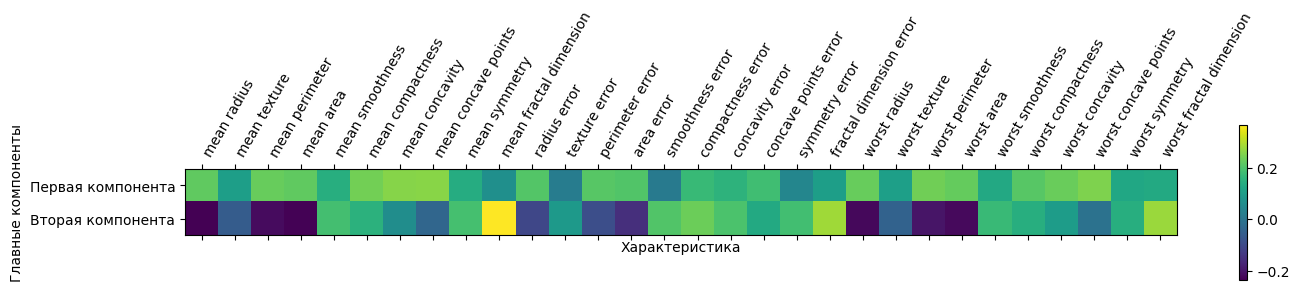

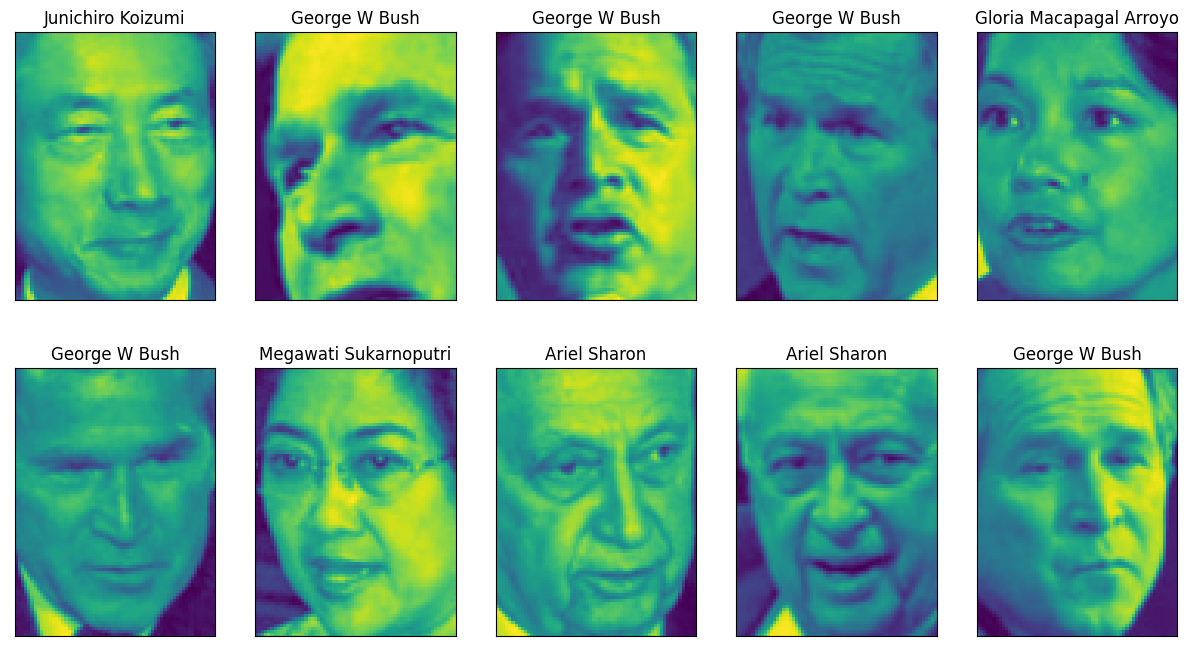

форма массива изображений лиц: (1405, 87, 65)
количество классов: 18
Alejandro Toledo           39 Ariel Sharon               77 Atal Bihari Vajpayee       24 
Bill Clinton               29 Donald Rumsfeld           121 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Hamid Karzai               22 
Igor Ivanov                20 Junichiro Koizumi          60 Kofi Annan                 32 
Lleyton Hewitt             41 Megawati Sukarnoputri      33 Tiger Woods                23 
Tom Daschle                25 Tony Blair                144 Vicente Fox                32 
Правильность на тестовом наборе для 1-nn: 0.44


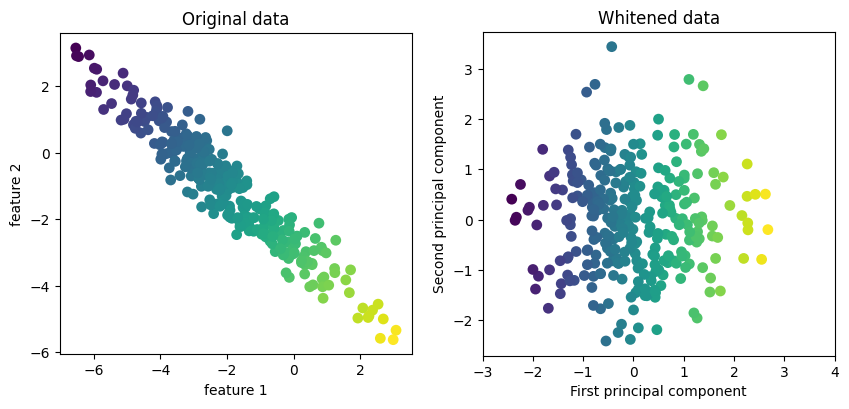

обучающие данные после PCA: (498, 100)
Правильность на тестовом наборе: 0.45
форма pca.components_: (100, 5655)


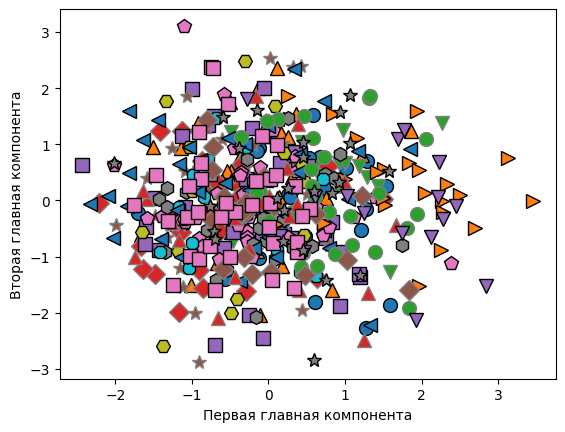

In [1]:
import sklearn
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

mglearn.plots.plot_pca_illustration()
plt.show()

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
 ax[0].set_xlabel("Значение признака")
 ax[0].set_ylabel("Частота")
ax[0].legend(["доброкачественная", "злокачественная"], loc="best")
fig.tight_layout()
plt.show()

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA

# оставляем первые две главные компоненты
pca = PCA(n_components=2)
# подгоняем модель PCA на наборе данных breast cancer
pca.fit(X_scaled)
# преобразуем данные к первым двум главным компонентам
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

# строим график первых двух главных компонент, классы выделены цветом
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.show()

print("форма главных компонент: {}".format(pca.components_.shape))

print("компоненты PCA:\n{}".format(pca.components_))

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты")
plt.show()

# conda install -c anaconda openssl
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])
plt.show()

print("форма массива изображений лиц: {}".format(people.images.shape))
print("количество классов: {}".format(len(people.target_names)))

# вычисляем частоту встречаемости каждого ответа
counts = np.bincount(people.target)
# печатаем частоты рядом с ответами
for i, (count, name) in enumerate(zip(counts, people.target_names)):
 print("{0:25} {1:3}".format(name, count), end=' ')
 if (i + 1) % 3 == 0:
  print()

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# для получения большей стабильности масштабируем шкалу оттенков серого так, чтобы значения
# были в диапазоне от 0 до 1 вместо использования шкалы значений от 0 до 255
X_people = X_people / 255.

from sklearn.neighbors import KNeighborsClassifier

# разбиваем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
 X_people, y_people, stratify=y_people, random_state=0)
# строим KNeighborsClassifier с одним соседом
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Правильность на тестовом наборе для 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

mglearn.plots.plot_pca_whitening()
plt.show()

pca = PCA(n_components=100,whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("обучающие данные после PCA: {}".format(X_train_pca.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test_pca, y_test)))

print("форма pca.components_: {}".format(pca.components_.shape))

 #fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 #subplot_kw={'xticks': (), 'yticks': ()})
#for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
#ax.imshow(component.reshape(image_shape), cmap='viridis')
 #ax.set_title("{}. component".format((i + 1))
 #plt.show()

#mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
#plt.show()

mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")
plt.show()
